## <span style="color:#585757"><center> Predicting Apple inc. Stock price</center></span>
![alt text](Assets/apple.jpeg)

In [1]:
# This program uses Three diffrent ML models (Liner Regression), (Decision Tree) and (Random Forest) 
# To predict the closing stock price of Apple inc.

In [2]:
# Import the dependencies
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('bmh')

In [3]:
# Load the data
df = pd.read_csv('Assets/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,0.314732,0.334821,0.312500,0.332589,0.266423,183198400
1,1990-01-03,0.339286,0.339286,0.334821,0.334821,0.268211,207995200
2,1990-01-04,0.341518,0.345982,0.332589,0.335938,0.269106,221513600
3,1990-01-05,0.337054,0.341518,0.330357,0.337054,0.270000,123312000
4,1990-01-08,0.334821,0.339286,0.330357,0.339286,0.271788,101572800


In [4]:
# Get the dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8050 entries, 0 to 8049
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8050 non-null   object 
 1   Open       8050 non-null   float64
 2   High       8050 non-null   float64
 3   Low        8050 non-null   float64
 4   Close      8050 non-null   float64
 5   Adj Close  8050 non-null   float64
 6   Volume     8050 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 440.4+ KB


- The data is cleaned and ready to use

In [5]:
# Convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])

In [6]:
# Retrive the data after 1-1-2010
df = df[~(df['Date'] < '2010-01-01')]

In [7]:
# Set the data column as index 
df.set_index('Date', inplace = True)

In [8]:
# center the images
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

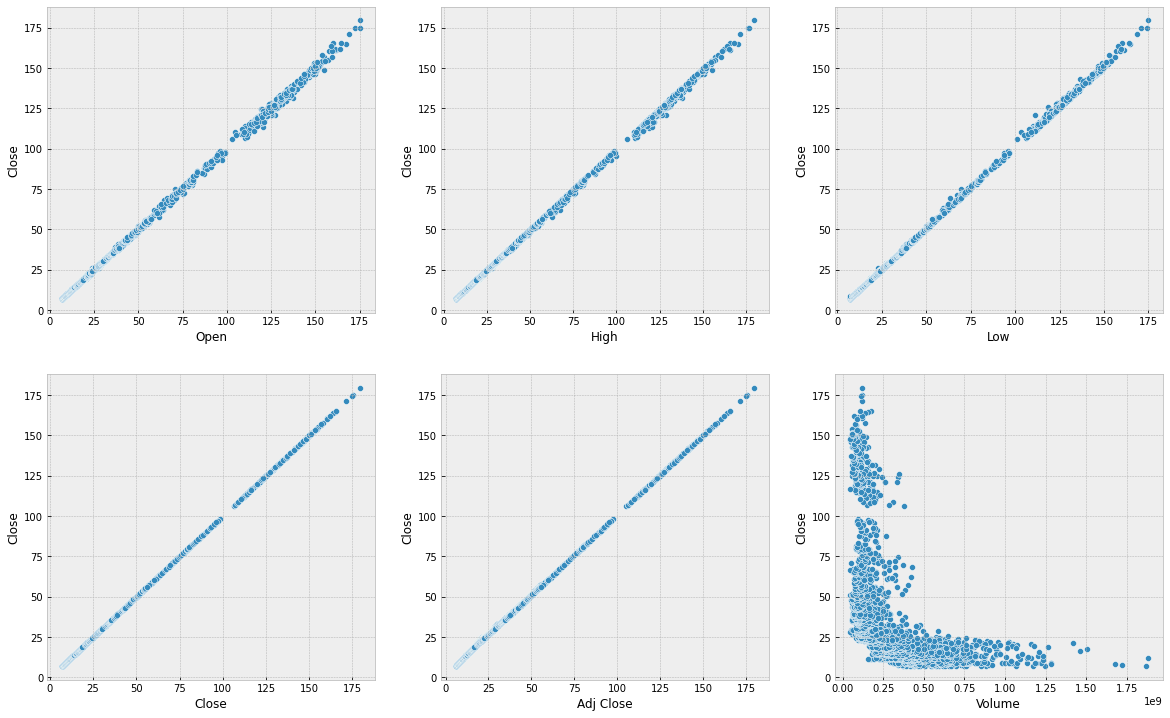

In [9]:
# Scatterplot for Numerical features
num_feat = ['Open','High','Low','Close','Adj Close', 'Volume']
plt.figure(figsize=(20,80))
for i in range(len(num_feat)):
    plt.subplot(12, 3, i+1)
    sns.scatterplot(x=df[num_feat[i]], y=df.Close)

plt.show()

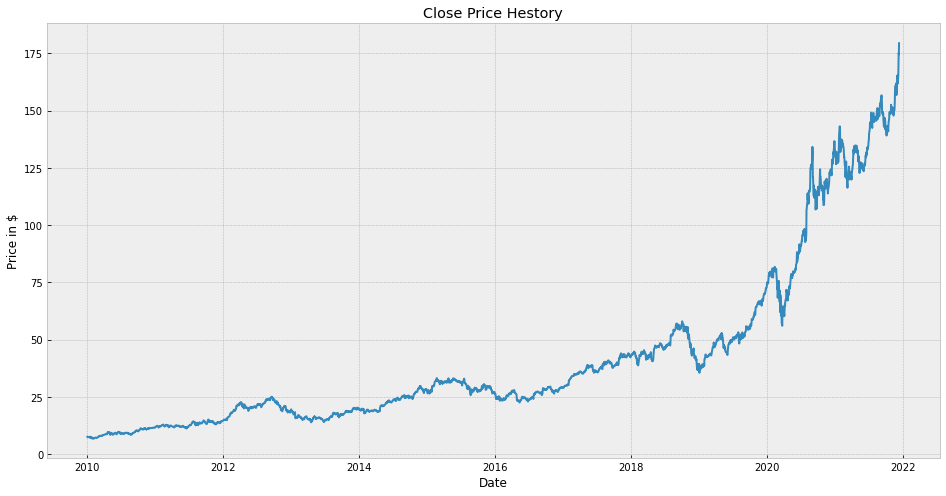

In [10]:
# Plot the closing price 
plt.figure(figsize=(16,8))
plt.title('Close Price Hestory')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.plot(df.Close)
plt.show()

In [11]:
# Get the Close price 
data = df[['Close']]
data.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [12]:
# Create a variable that predict 'x' days out from the future (50 days)
days = 50
# Create the target column 
data['Preds'] = data[['Close']].shift(-days)
data.tail()

<ipython-input-12-add5a16e8b44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Preds'] = data[['Close']].shift(-days)


,Close,Preds
Date,,
2021-12-06,165.320007,NaN
2021-12-07,171.179993,NaN
2021-12-08,175.080002,NaN
2021-12-09,174.559998,NaN
2021-12-10,179.449997,NaN


In [13]:
# Create the feature dataset (X)
X = np.array(data.drop(['Preds'],1))[:-days]
# Create the target dataset (y)
y = np.array(data['Preds'])[:-days]

In [14]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [15]:
# Create the models 
# Liner Regression 
lr = LinearRegression().fit(X_train,y_train)
# Decision Tree
dt = DecisionTreeRegressor().fit(X_train,y_train)
# Random Forest 
rf = RandomForestRegressor().fit(X_train,y_train)

In [16]:
# Get the last 'x' rows of the feature dataset 
x_future = data.drop(['Preds'],1)[:-days]
x_future = x_future.tail(days)
x_future = np.array(x_future)

In [17]:
# Make the Prediction 
# Liner Regression 
lr_preds = lr.predict(x_future)
print(lr_preds)
print()
# Decision tree
dt_preds = dt.predict(x_future)
print(dt_preds)
print()
# Random Forest
rf_preds = rf.predict(x_future)
print(rf_preds)
print()

[155.56964408 157.43420001 157.88975364 155.53786284 153.64151084
 154.34072448 154.57379675 154.2136006  156.16291144 155.72854919
 155.84508532 154.87042938 154.81745571 154.29835551 154.57379675
 157.7838063  158.00628977 160.14628589 159.16104221 155.10350165
 155.46369674 157.04222262 158.6525308  158.55717121 157.22232123
 156.35359673 157.47658488 162.26510548 160.89847426 161.6188655
 162.8265916  163.5152175  166.04720584 164.37333731 163.27155749
 157.8685612  158.483021   156.96805652 157.93212367 157.67785896
 154.78567553 151.48032123 151.99942249 154.56320795 155.60142531
 155.69676795 154.0546796  150.38913126 151.36378615 149.95476901]

[142.       139.139999 141.110001 142.       143.289993 142.899994
 146.144997 149.259995 151.279999 143.759995 144.839996 142.830002
 148.759995 149.259995 146.144997 148.690002 148.639999 149.320007
 148.850006 152.570007 149.800003 148.960007 150.020004 151.490005
 150.960007 151.279999 150.440002 150.809998 147.919998 147.869995
 149

<ipython-input-18-8beecadf983d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Pred'] = pred


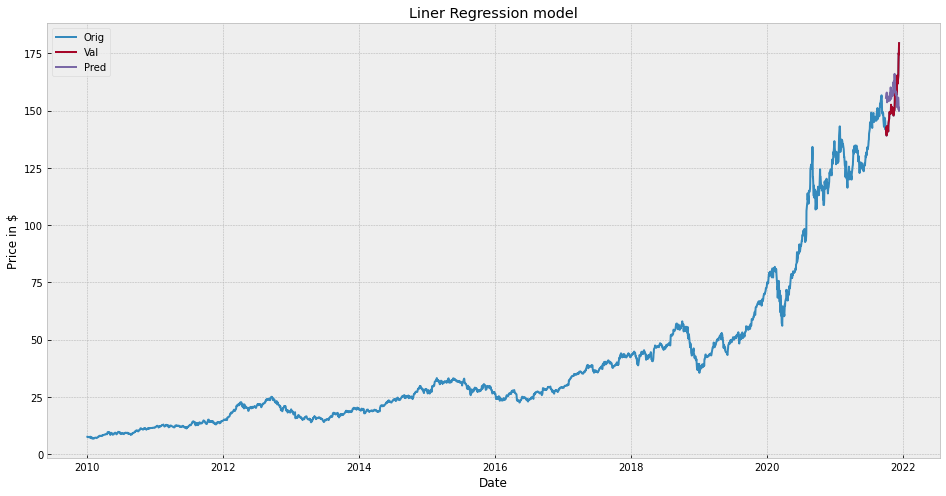

In [18]:
# Visulaize the Results (LR)
pred = lr_preds

valid = data[X.shape[0]:]
valid['Pred'] = pred
plt.figure(figsize=(16,8))
plt.title('Liner Regression model')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.plot(data.Close)
plt.plot(valid[['Close', 'Pred']])
plt.legend(['Orig','Val','Pred'])
plt.show()

<ipython-input-19-ca98164cfa47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Pred'] = pred


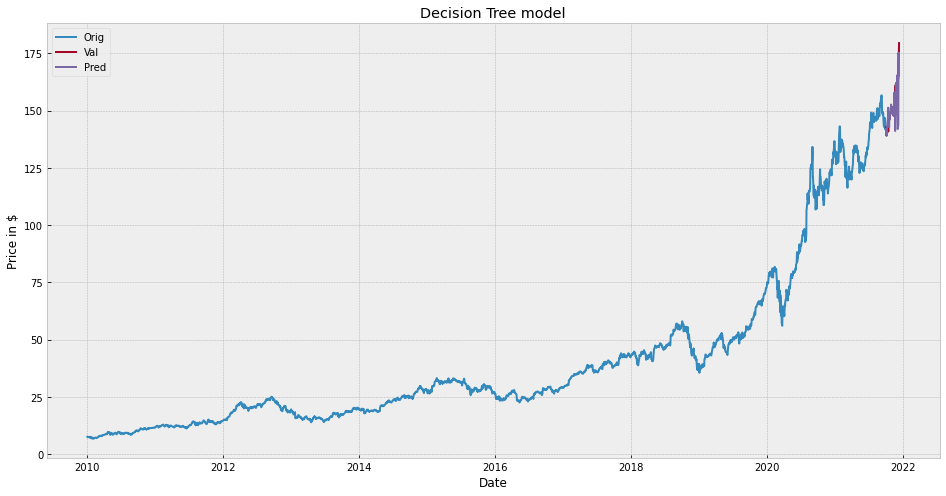

In [19]:
# Visulaize the Results (DT)
pred = dt_preds

valid = data[X.shape[0]:]
valid['Pred'] = pred
plt.figure(figsize=(16,8))
plt.title('Decision Tree model')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.plot(data.Close)
plt.plot(valid[['Close', 'Pred']])
plt.legend(['Orig','Val','Pred'])
plt.show()

<ipython-input-20-0633df29361f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Pred'] = pred


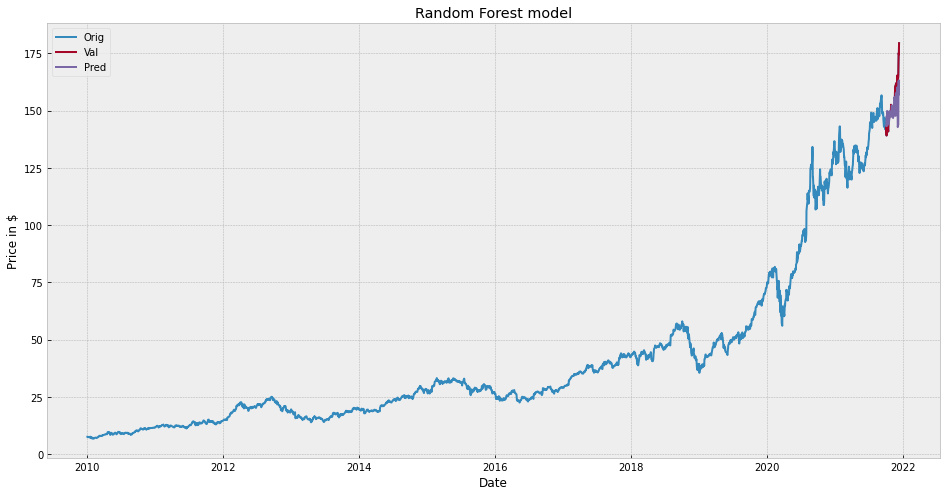

In [20]:
# Visulaize the Results (RF)
pred = rf_preds

valid = data[X.shape[0]:]
valid['Pred'] = pred
plt.figure(figsize=(16,8))
plt.title('Random Forest model')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.plot(data.Close)
plt.plot(valid[['Close', 'Pred']])
plt.legend(['Orig','Val','Pred'])
plt.show()

### <span style="color:#585757"><center> In conclusion Between these three models the decision tree gave the best results</center></span>